In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
data = pd.read_csv('Dataset.csv')
data.head()

,Magazine Name,pagecost,circ,percmale,medianincome
0,Business India,23000,5900,6,29800
1,Business Today,75000,12000,12,44300
2,children's magazine,50000,5210,13,45000
3,CTO,150000,18000,16,34600
4,New Horizon,46000,8900,55,33800


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Magazine Name  44 non-null     object
 1   pagecost       44 non-null     int64 
 2   circ           44 non-null     int64 
 3   percmale       44 non-null     int64 
 4   medianincome   44 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.8+ KB


In [4]:
data.describe()

,pagecost,circ,percmale,medianincome
count,44.000000,44.000000,44.000000,44.000000
mean,77463.772727,15250.272727,48.727273,47323.909091
std,46998.221040,11397.290615,27.198977,9798.149723
min,19300.000000,2900.000000,6.000000,29800.000000
25%,43729.250000,8063.750000,23.000000,39600.000000
50%,71000.000000,10520.000000,54.000000,44839.500000
75%,100000.000000,18525.000000,72.000000,56981.000000
max,200000.000000,54000.000000,98.000000,69873.000000


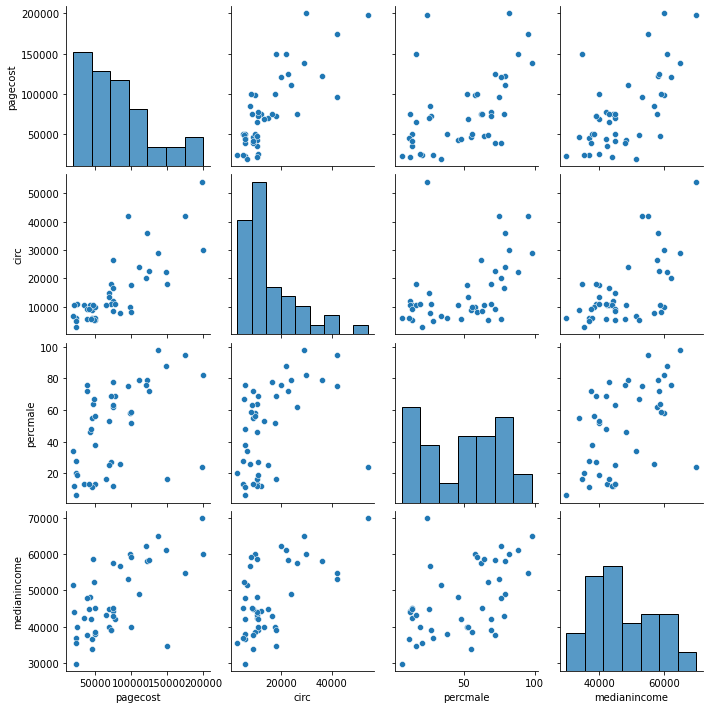

In [5]:
sns.pairplot(data)

<AxesSubplot:xlabel='pagecost', ylabel='Count'>

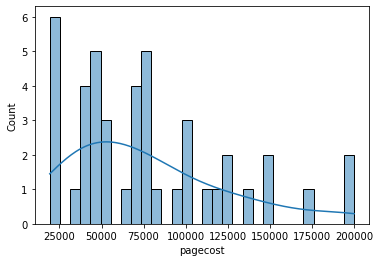

In [6]:
sns.histplot(data=data, x='pagecost', kde=True, bins=30)

<AxesSubplot:xlabel='circ', ylabel='Count'>

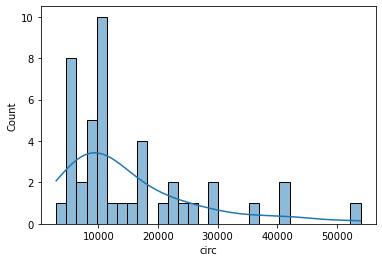

In [7]:
sns.histplot(data=data, x='circ', kde=True, bins=30)

<AxesSubplot:xlabel='percmale', ylabel='Count'>

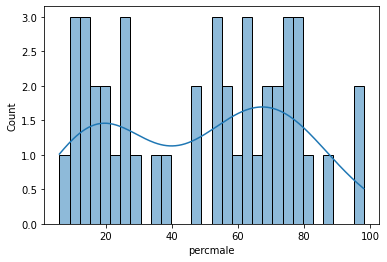

In [8]:
sns.histplot(data=data, x='percmale', kde=True, bins=30)


<AxesSubplot:xlabel='medianincome', ylabel='Count'>

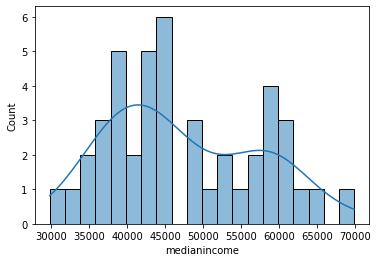

In [9]:
sns.histplot(data=data, x='medianincome', kde=True, bins=20)

<AxesSubplot:xlabel='pagecost', ylabel='circ'>

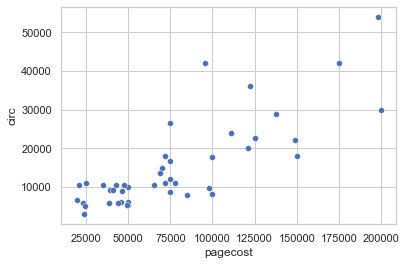

In [10]:
sns.set(style='whitegrid')
sns.scatterplot(data=data, x= 'pagecost', y='circ')

#there's a good amount of circulation for pagecost amount ranging between 25k and 75k

<AxesSubplot:xlabel='pagecost', ylabel='Magazine Name'>

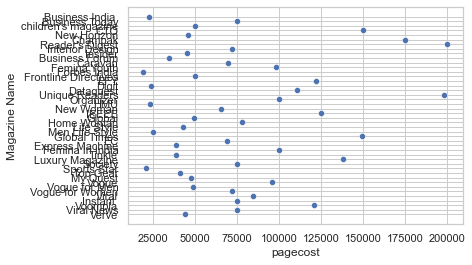

In [11]:
sns.scatterplot(data=data, x= 'pagecost', y='Magazine Name')
#more data points within the range of 25k and 75k pagecost. 
#Which means this range is pretty standard and proven to be working in the market for other customers as well

<AxesSubplot:xlabel='pagecost', ylabel='percmale'>

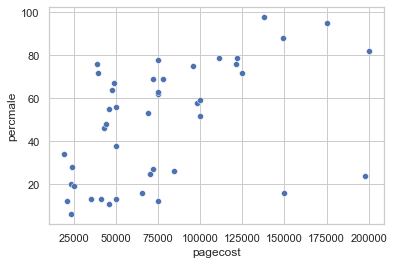

In [12]:
sns.scatterplot(data=data, x= 'pagecost', y='percmale')

#there are more male readers, around 70% to 80% for the ads that has the pagecost ranging between 25k and 75k

<AxesSubplot:xlabel='pagecost', ylabel='medianincome'>

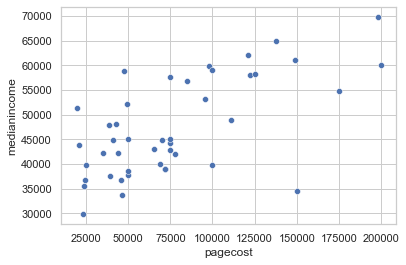

In [13]:
sns.scatterplot(data=data, x= 'pagecost', y='medianincome')

#good reception when ads are targeted towards readership having Median household income between 35k and 45k
#this will help determine the nature, elements, illustrations, words to be used to reach this audience

In [14]:
data.columns

Index(['Magazine Name', 'pagecost', 'circ', 'percmale', 'medianincome'], dtype='object')

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [16]:
myLinModel = LinearRegression()

In [17]:
X = data[['circ', 'percmale', 'medianincome']]
Y = data[['pagecost']]

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [19]:
myLinModel.fit(X_train, y_train)

LinearRegression()

In [20]:
prediction = myLinModel.predict(X_test)

Text(0, 0.5, 'Predicted Y')

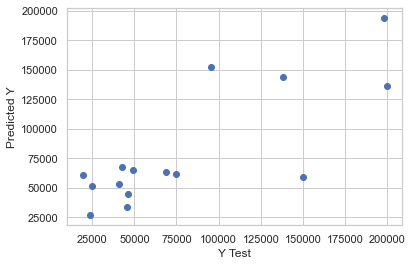

In [21]:
plt.scatter(y_test,prediction)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

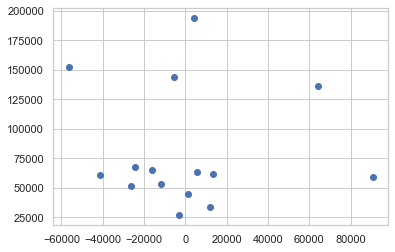

In [22]:

plt.scatter( (y_test - prediction), prediction)

In [23]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 25048.649805839137
MSE: 1290227511.7748704
RMSE: 35919.737078309336


c:\Users\Pavan.R\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

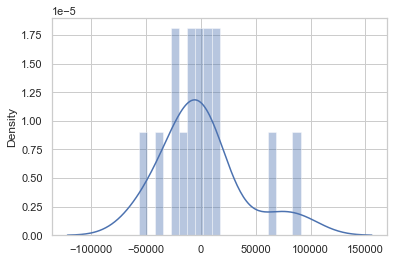

In [24]:
sns.distplot((y_test-prediction),bins=20)

In [25]:
print(myLinModel.coef_)
print(X.columns)

#Percentage of male readers has highest co-efficient value and says it has the strongest relationship to pagecost

[[  2.29773159 190.85672226   1.43682373]]
Index(['circ', 'percmale', 'medianincome'], dtype='object')


In [31]:
myLinModel.intercept_

array([-35034.38674183])

In [26]:
from sklearn.metrics import r2_score
r2_score(y_test,prediction)

#the score is bad hence the dataset is not good enough

0.6352248250994472

Building the model and interpreting the coefficients

In [27]:

import statsmodels.formula.api as sm

In [29]:
data1 = pd.read_csv('Dataset.csv')
data1.head()

,Magazine Name,pagecost,circ,percmale,medianincome
0,Business India,23000,5900,6,29800
1,Business Today,75000,12000,12,44300
2,children's magazine,50000,5210,13,45000
3,CTO,150000,18000,16,34600
4,New Horizon,46000,8900,55,33800


In [30]:
# Fitting the OLS on data
model = sm.ols('pagecost ~ circ + percmale + medianincome', data1).fit()
print(model.params)

Intercept      -19640.966260
circ                2.596792
percmale          167.006091
medianincome        1.043134
dtype: float64


** if I consider keeping the percmale and medianincome same/ignore and choose the circulation as the driving factor and say for every 1000 units increase of circulation, it will incur a page cost of $2600 [2.6*1000 = $2600 page cost] for every 1000 circ 

** if I consider keeping the circ and medianincome same/ignore and choose the percmale readers as the driving factor and say for every 10 units/percentage increase of percmale readers, it will incur a page cost of $1670 [167.006*10 = $1670 page cost] for every 10% percmale readers

** if I consider keeping the circ and percmale same/ignore and choose the medianincome as the driving factor and say for every 1000 units increase in medianincome, it will incur a page cost of $2600 [1.043134*1000 = $1043 page cost] for every 1000 units of medianincome 


Using  this  model  with  ALL  the  variables,  provide  a  point  estimate  and  an  appropriate   interval  to  the  retail  clothing  company  for  the 
amount that they should expect to pay for a full-page ad in a magazine with a projected audience of 2,125,000 readers, 45 percent of which 
are male, with a median income of $50,000. Include notation and units. Interpret these results.

In [32]:
data1.corr()

,pagecost,circ,percmale,medianincome
pagecost,1.000000,0.802793,0.483258,0.643500
circ,0.802793,1.000000,0.441127,0.599726
percmale,0.483258,0.441127,1.000000,0.500365
medianincome,0.643500,0.599726,0.500365,1.000000


C:\Users\Pavan.R\AppData\Local\Temp\ipykernel_9640\2465016851.py:2: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


([<matplotlib.axis.YTick at 0x224151c6280>,
 [Text(0, 0, 'Magazine Name'),
  Text(0, 1, 'pagecost'),
  Text(0, 2, 'circ'),
  Text(0, 3, 'percmale'),
  Text(0, 4, 'medianincome')])

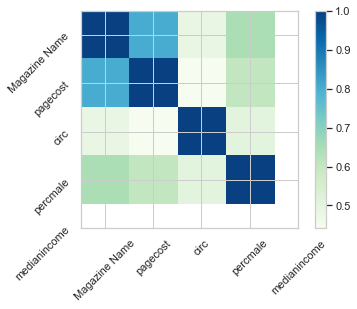

In [33]:
plt.imshow(data1.corr(), cmap=plt.cm.GnBu, interpolation='nearest',data=True)
plt.colorbar()
tick_marks = [i for i in range(len(data1.columns))]
plt.xticks(tick_marks, data.columns, rotation=45)
plt.yticks(tick_marks, data.columns, rotation=45)

<AxesSubplot:>

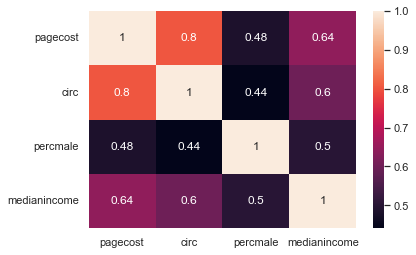

In [39]:
sns.heatmap(data1.corr(), annot=True)

In [ ]:
#Colinearity
#median income and circ is strongly corelated  with 0.6 ,
# percentage of male readers and median income with 0.5 
#maleReaders and circ with 0.44

In [42]:
print(model.summary2())

                     Results: Ordinary least squares
Model:                OLS                Adj. R-squared:       0.669     
Dependent Variable:   pagecost           AIC:                  1026.7023 
Date:                 2022-08-10 10:39   BIC:                  1033.8390 
No. Observations:     44                 Log-Likelihood:       -509.35   
Df Model:             3                  F-statistic:          29.98     
Df Residuals:         40                 Prob (F-statistic):   2.52e-10  
R-squared:            0.692              Scale:                7.3088e+08
-------------------------------------------------------------------------
                Coef.     Std.Err.     t    P>|t|     [0.025     0.975]  
-------------------------------------------------------------------------
Intercept    -19640.9663 21896.9012 -0.8970 0.3751 -63896.2542 24614.3216
circ              2.5968     0.4617  5.6242 0.0000      1.6636     3.5300
percmale        167.0061   178.8142  0.9340 0.3559   -194.3

If the value of F-statistic is equal to or very close to 1, then the results are in favor of the Null Hypothesis and we fail to reject it.

But as we can see that the F-statistic is many folds larger than 1, thus providing strong evidence against the Null Hypothesis (that all coefficients are zero). Hence, we reject the Null Hypothesis and are confident that at least one predictor is useful in predicting the output.

We are going to use 2 measures to evaluate our new model after each addition: RSS and R².

We are already familiar with RSS which is the Residual Sum of Squares and is calculated by squaring the difference between actual outputs and predicted outcomes. It should be minimum for the model to perform well.

R² is the measure of the degree to which variance in data is explained by the model. Mathematically, it’s the square of the correlation between actual and predicted outcomes. R² closer to 1 indicates that the model is good and explains the variance in data well. A value closer to zero indicates a poor model.

In [44]:
data1.head()

,Magazine Name,pagecost,circ,percmale,medianincome
0,Business India,23000,5900,6,29800
1,Business Today,75000,12000,12,44300
2,children's magazine,50000,5210,13,45000
3,CTO,150000,18000,16,34600
4,New Horizon,46000,8900,55,33800


In [45]:
# Defining a function to evaluate a model
def evaluateModel(model):
    print("RSS = ", ((data1.pagecost - model.predict())**2).sum())
    print("R2 = ", model.rsquared)

In [46]:
# For circ
model_circ = sm.ols('pagecost ~ circ', data1).fit()
evaluateModel(model_circ)

RSS =  33767572489.065838
R2 =  0.6444763088230778


In [47]:
# For percmale
model_percmale = sm.ols('pagecost ~ percmale', data1).fit()
evaluateModel(model_percmale)

RSS =  72798369132.14302
R2 =  0.2335384809227785


In [48]:
# For medianincome
model_medianincome = sm.ols('pagecost ~ medianincome', data1).fit()
evaluateModel(model_medianincome)

RSS =  55649393638.94853
R2 =  0.41409238568502593


In [ ]:
#We observe that for model_circ, the RSS is least and R² value is the most among all the models. Hence we select model_circ as our base model to move forward.